
Training ANN Model...
Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 0s 138us/sample - loss: 0.7064 - acc: 0.5033 - val_loss: 0.6934 - val_acc: 0.5433
Epoch 2/10
1200/1200 [==============================] - 0s 46us/sample - loss: 0.6956 - acc: 0.5383 - val_loss: 0.6999 - val_acc: 0.4600
Epoch 3/10
1200/1200 [==============================] - 0s 39us/sample - loss: 0.6913 - acc: 0.5233 - val_loss: 0.6940 - val_acc: 0.5133
Epoch 4/10
1200/1200 [==============================] - 0s 37us/sample - loss: 0.6931 - acc: 0.5233 - val_loss: 0.6890 - val_acc: 0.5267
Epoch 5/10
1200/1200 [==============================] - ETA: 0s - loss: 0.6642 - acc: 0.656 - 0s 38us/sample - loss: 0.6932 - acc: 0.5242 - val_loss: 0.6896 - val_acc: 0.5233
Epoch 6/10
1200/1200 [==============================] - 0s 30us/sample - loss: 0.6851 - acc: 0.5633 - val_loss: 0.6926 - val_acc: 0.5267
Epoch 7/10
1200/1200 [==============================] - 0s 49us/sampl

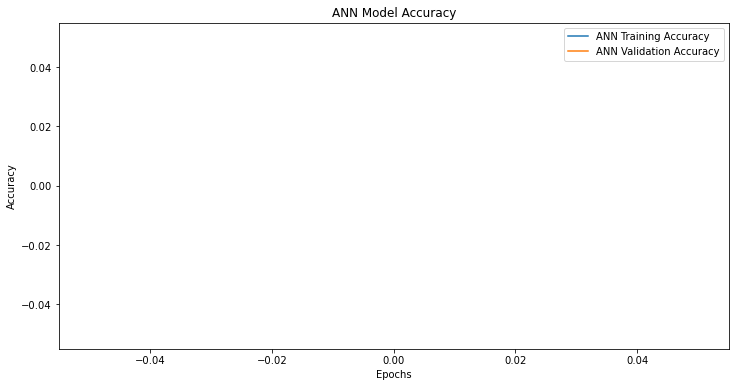

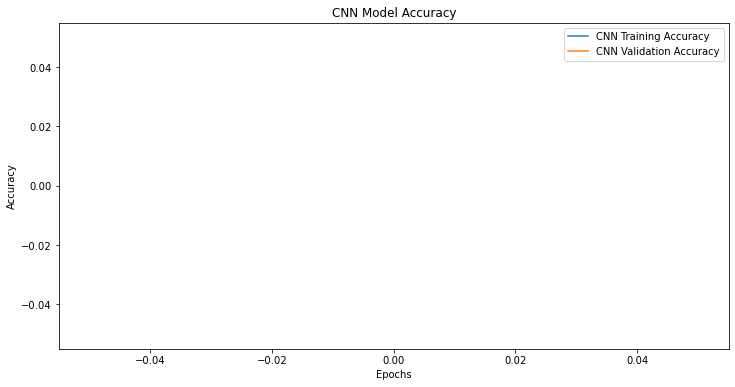

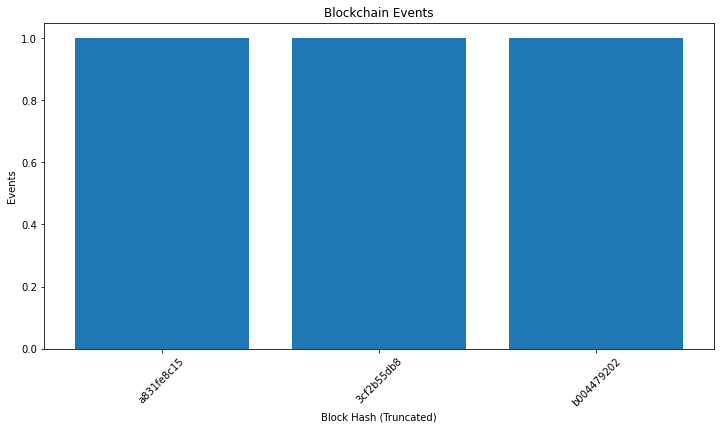


Evaluating ANN Model...
300/300 [==============================] - 0s 55us/sample - loss: 0.6924 - acc: 0.5033
ANN Test Accuracy: 0.50

Evaluating CNN Model...
300/300 [==============================] - 0s 148us/sample - loss: 0.6906 - acc: 0.5433
CNN Test Accuracy: 0.54


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from hashlib import sha256

# Step 1: Simulate or Load Dataset
# Simulate structured dataset (e.g., website traffic data)
np.random.seed(42)
n_samples = 1500
n_features = 20

# Structured features
X_structured = np.random.rand(n_samples, n_features)
y_structured = np.random.choice(['benign', 'attack'], size=n_samples)

# Simulate image dataset (e.g., screenshots of suspicious logs)
X_image = np.random.rand(n_samples, 32, 32, 1)  # 32x32 grayscale images
y_image = y_structured

# Encode labels for ANN and CNN
label_encoder = LabelEncoder()
y_structured_encoded = label_encoder.fit_transform(y_structured)
y_structured_encoded = to_categorical(y_structured_encoded)

y_image_encoded = label_encoder.transform(y_image)
y_image_encoded = to_categorical(y_image_encoded)

# Split data for ANN and CNN
X_train_structured, X_test_structured, y_train_structured, y_test_structured = train_test_split(
    X_structured, y_structured_encoded, test_size=0.2, random_state=42
)
X_train_image, X_test_image, y_train_image, y_test_image = train_test_split(
    X_image, y_image_encoded, test_size=0.2, random_state=42
)

# Step 2: Build ANN Model (Structured Data)
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_structured.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_structured.shape[1], activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ANN model
print("\nTraining ANN Model...")
ann_history = ann_model.fit(
    X_train_structured, y_train_structured,
    validation_data=(X_test_structured, y_test_structured),
    epochs=10, batch_size=32
)

# Step 3: Build CNN Model (Image Data)
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train_image.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train_image.shape[1], activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
print("\nTraining CNN Model...")
cnn_history = cnn_model.fit(
    X_train_image, y_train_image,
    validation_data=(X_test_image, y_test_image),
    epochs=10, batch_size=32
)

# Step 4: Blockchain Logging (Simulated)
blockchain_log = []

def log_to_blockchain(event):
    if blockchain_log:
        prev_hash = blockchain_log[-1]['hash']
    else:
        prev_hash = "0" * 64
    block = {
        'data': event,
        'prev_hash': prev_hash,
        'hash': sha256((event + prev_hash).encode()).hexdigest()
    }
    blockchain_log.append(block)

# Log security events
log_to_blockchain("Attack detected: SQL Injection on 2025-01-23")
log_to_blockchain("Suspicious login attempt blocked on 2025-01-23")
log_to_blockchain("Firewall rules updated on 2025-01-23")

# Display Blockchain Logs
print("\nBlockchain Logs:")
for block in blockchain_log:
    print(block)

# Step 5: Visualizations
# Debugging keys in ANN and CNN histories
print("\nANN History Keys:", ann_history.history.keys())
print("\nCNN History Keys:", cnn_history.history.keys())

# Use the correct metric keys for ANN training performance visualization
plt.figure(figsize=(12, 6))
plt.plot(ann_history.history.get('accuracy', []), label='ANN Training Accuracy')
plt.plot(ann_history.history.get('val_accuracy', []), label='ANN Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Use the correct metric keys for CNN training performance visualization
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history.get('accuracy', []), label='CNN Training Accuracy')
plt.plot(cnn_history.history.get('val_accuracy', []), label='CNN Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Blockchain Logs Visualization
plt.figure(figsize=(12, 6))
block_data = [block['data'] for block in blockchain_log]
block_hashes = [block['hash'][:10] for block in blockchain_log]  # Display only first 10 characters
plt.bar(range(len(block_data)), [1] * len(block_data), tick_label=block_hashes)
plt.title("Blockchain Events")
plt.ylabel("Events")
plt.xlabel("Block Hash (Truncated)")
plt.xticks(rotation=45)
plt.show()

# Step 6: Save Models
ann_model.save('website_cyber_ann_model.h5')
cnn_model.save('website_cyber_cnn_model.h5')

# Evaluate Models
print("\nEvaluating ANN Model...")
ann_loss, ann_accuracy = ann_model.evaluate(X_test_structured, y_test_structured)
print(f"ANN Test Accuracy: {ann_accuracy:.2f}")

print("\nEvaluating CNN Model...")
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_image, y_test_image)
print(f"CNN Test Accuracy: {cnn_accuracy:.2f}")
